# Correlation between entropy/FD metrics

In [1]:
import numpy as np
import pandas as pd
import antropy as ant
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.25)

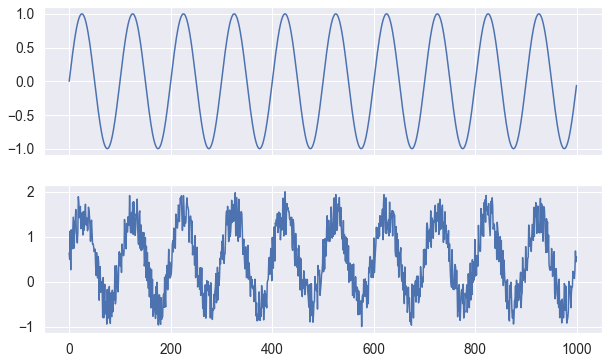

In [2]:
# Generate 1000 1Hz sines with increasing noise
np.random.seed(123)
N = 1000
sf = 100
n_sines = 100
noises_factor = np.linspace(0, 1, n_sines)
noises = np.random.rand(n_sines, N)
sines = np.zeros(shape=(n_sines, N))
for i in range(n_sines):
    sines[i] = np.sin(2 * np.pi * np.arange(N) / sf) + noises_factor[i] * noises[i, :]
    
# Plot the first and last sines
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=False)
ax1.plot(sines[0])
ax2.plot(sines[-1]);

In [3]:
# Compute the entropy metrics
df = pd.DataFrame()

for i in range(n_sines):
    df = df.append({
        'PermEnt': ant.perm_entropy(sines[i], order=3, normalize=True),
        'SVDEnt' : ant.svd_entropy(sines[i], order=3, normalize=True),
        'SpecEnt' : ant.spectral_entropy(sines[i], sf, normalize=True),
        'AppEnt': ant.app_entropy(sines[i], order=2),
        'SampleEnt': ant.sample_entropy(sines[i], order=2),
        'PetrosianFD': ant.petrosian_fd(sines[i]),
        'KatzFD': ant.katz_fd(sines[i]),
        'HiguchiFD': ant.higuchi_fd(sines[i]),
        'DFA': ant.detrended_fluctuation(sines[i])}, ignore_index=True)

df.head().round(3)

,AppEnt,DFA,HiguchiFD,KatzFD,PermEnt,PetrosianFD,SVDEnt,SampleEnt,SpecEnt
0,0.200,1.926,1.014,2.145,0.447,1.001,0.177,0.164,0.000
1,0.202,1.925,1.015,2.141,0.483,1.002,0.192,0.164,0.000
2,0.203,1.925,1.017,2.144,0.537,1.003,0.204,0.165,0.000
3,0.211,1.924,1.020,2.138,0.610,1.006,0.214,0.169,0.000
4,0.224,1.918,1.027,2.148,0.626,1.006,0.224,0.176,0.001


In [4]:
# Describe
df.agg(['min', 'median', 'max']).round(2).T

,min,median,max
AppEnt,0.20,0.95,1.40
DFA,1.42,1.63,1.93
HiguchiFD,1.01,1.61,1.85
KatzFD,2.14,3.31,4.45
PermEnt,0.45,1.00,1.00
PetrosianFD,1.00,1.03,1.04
SVDEnt,0.18,0.56,0.71
SampleEnt,0.16,0.92,1.46
SpecEnt,0.00,0.07,0.20


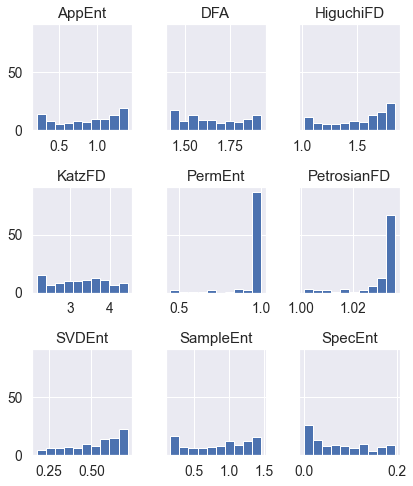

In [5]:
# Distribution
df.hist(figsize=(6, 7), layout=(3, 3), sharey=True)
plt.tight_layout()

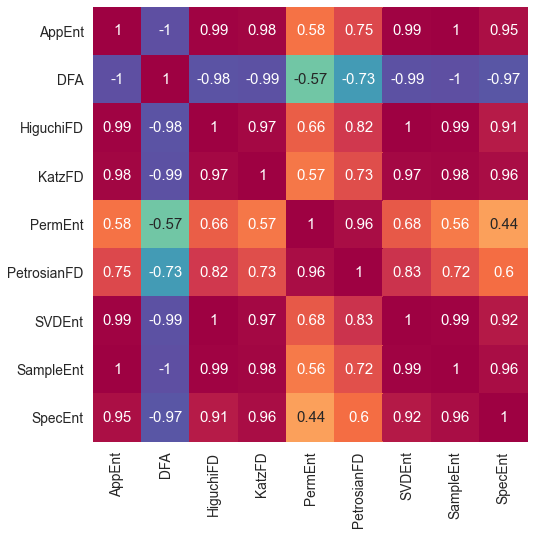

In [6]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cbar=False, 
            cmap='Spectral_r', square=True);

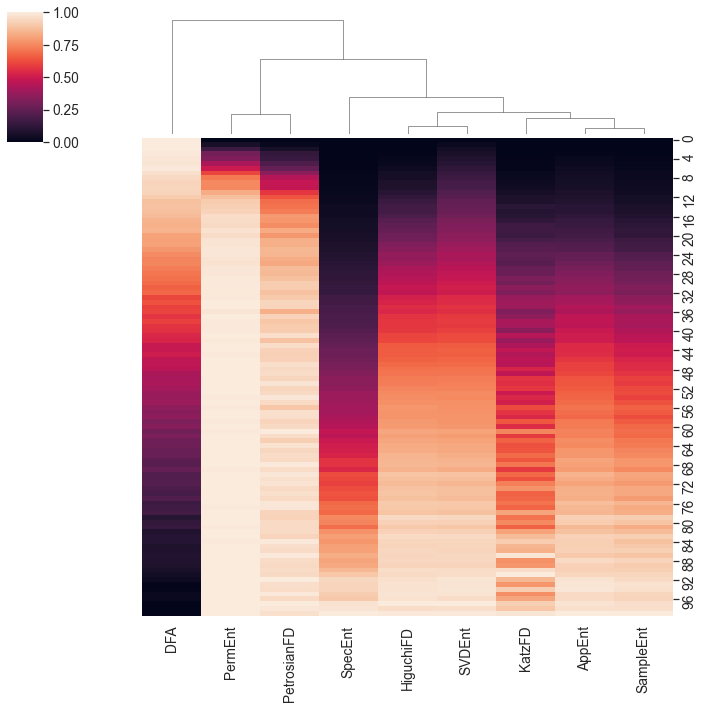

In [7]:
sns.clustermap(df, row_cluster=False, standard_scale=1);